In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movie = pd.read_csv('data/movie.csv')

In [3]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']

In [4]:
m = movie[cols].dropna()

In [5]:
m['budget2'] = m['budget'] / 1e6   # in millions

In [6]:
### selecting any 100 movies after 2000

In [7]:
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

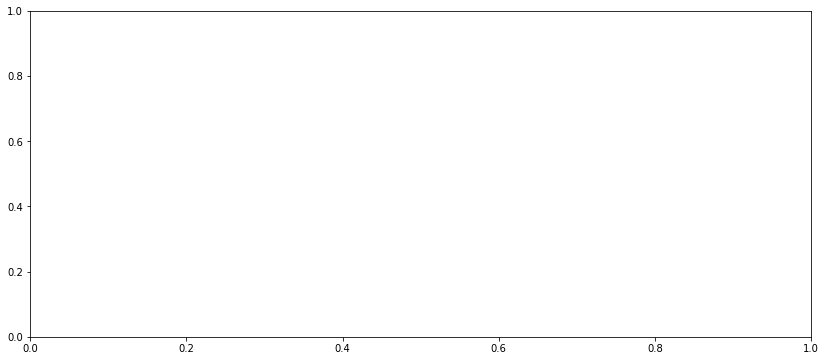

In [8]:
fig, ax = plt.subplots(figsize=(14,6))

In [9]:
ax.scatter(x='title_year', y='imdb_score',
           s='budget2', data=movie_samp)

In [10]:
idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()

### annotating top and lowest budget movies with arrows

In [12]:
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score), 
                xytext=(year + 1, score + offset), 
                text=title + ' ({})'.format(score),
                ha='center',
                size=16,
                arrowprops=dict(arrowstyle="fancy"))

In [13]:
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

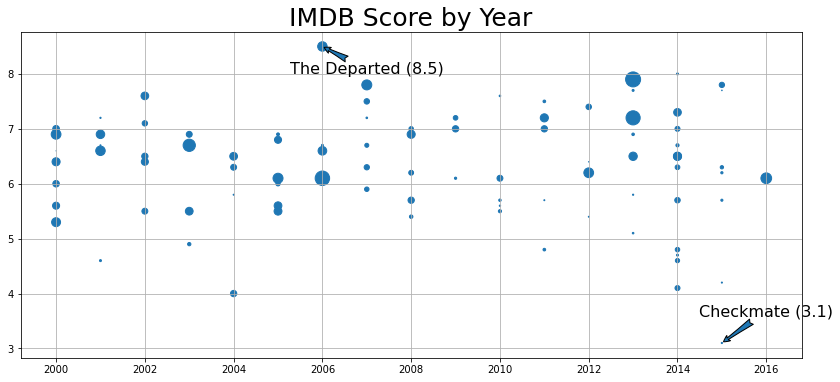

In [14]:
fig